In [1]:
from platform import python_version

print(python_version())

3.8.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy import constants

In [3]:
#Global variables
L = 10 #unit:nm length of the box
N = 100 #unit:numbers
m = 39.948 # unit: a.m.u
T = 100 #unit:kelvin
KB = constants.R*10**-3  #unit KJ/mol.K
dt = 10**-3 #unit:ps
n_steps =1000000 #unitness
epsilon = 1
sigma = 0.34

In [4]:
#import os
#def pdb_writer(pos, file_name):#function writes position in pdb format
#   file_name = 'test.txt'
#    pos = os.path.splitext(test)[0]
#    os.rename(test, base + '.pdb')

In [4]:
def write_file(FILE1, coords, n_iter):
    
    '''
    
    This function is used to save obtained coordinates into the PyMol readable format PDB.
    It also writes several other interesting stuff to plain .txt files.
    
    FILE1 := Coordinaten File Name (Should end with .pdb)
    n_iter := Number of step
    
    '''


    #Coordinates are round to the second decimal position to faciliate saving
    round_ = 2

    #Write head for each frame   
    FILE1.write('MODEL {}\n'.format(n_iter)) #Start of a frame
    N = coords.shape[0] #Get number of atoms
    
    
    #Just iterate over all coordinates and write them down line per line
    for i in range(N):
        
        #The PDB-formate is really strict the line below is from: https://cupnet.net/pdb-format/
 
        #ATOM  #ID   #NAME     #RESN      #RESID          #X    #Y     #Z
        coord_str = "{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}\n".format('ATOM', int(i),
                                                                                                                         'PAR', ' ', 'ARG',
                                                                                                                         ' ', int(i), ' ',
                                                                                                                         np.round(coords[i][0], round_)*10,
                                                                                                                         np.round(coords[i][1], round_)*10,
                                                                                                                         np.round(coords[i][2], round_)*10,
                                                                                                                          1.0, 1.0, 'Ar', ' ')
 
 
        FILE1.write(coord_str) #Write coordinates
    FILE1.write('TER\nENDMDL\n') #End of a frame

In [5]:
def init_pos():
    coord =[]
    Grid = L
    for i in range(N):
        coordinates = [np.random.choice(np.arange(0.1,Grid,0.1)), np.random.choice(np.arange(0.1,Grid,0.1)), np.random.choice(np.arange(0.1,Grid,0.1))]
        coord.append(coordinates)
    
    return np.array(coord)

#    x = [np.arange(0.1,L,0.1) for i in range(N)]
#    y = [np.arange(0.1,L,0.1) for i in range(N)]
#    z = [np.arange(0.1,L,0.1) for i in range(N)]

#    return x, y, z # pos.shape =(Nx3)
#keine Überlappung, Teilchen in der Box

In [10]:
initpos=init_pos()
np.shape(initpos)
initpos

array([[1.1, 0.6, 6.5],
       [7. , 2.3, 4.4],
       [9.6, 5.6, 5.6],
       [8.8, 1.1, 6.7],
       [0.5, 6.4, 3.2],
       [7.6, 5.7, 4.1],
       [0.5, 3.7, 2.6],
       [6.7, 3.8, 5.2],
       [5.5, 3.4, 5. ],
       [4.4, 9.9, 6.9],
       [8.4, 1.1, 5.5],
       [6.7, 3.1, 7.7],
       [3. , 9.1, 4.9],
       [1.3, 6.6, 4.8],
       [3.4, 3.6, 8.7],
       [9.2, 0.8, 6.2],
       [7.9, 4.2, 9.8],
       [2.7, 1.8, 0.5],
       [0.6, 0.6, 6.6],
       [4.2, 1.7, 9.2],
       [3.3, 6.3, 4.1],
       [9.5, 3.9, 1.1],
       [9.8, 1.6, 7.7],
       [4.8, 3.2, 9.7],
       [6. , 6. , 7. ],
       [2.3, 6.9, 4.9],
       [6. , 2.9, 5.9],
       [9.5, 1.6, 4.3],
       [1.8, 0.8, 8.2],
       [7.2, 5.1, 5.4],
       [3.4, 9.7, 6. ],
       [1.8, 8.3, 0.5],
       [5.7, 4.1, 0.3],
       [6.1, 2.9, 5.6],
       [5.5, 0.8, 4.8],
       [4.1, 9.1, 3. ],
       [3. , 3.9, 6.2],
       [6.7, 1.2, 1.5],
       [3. , 4.5, 0.2],
       [4.7, 3.4, 0.6],
       [8.5, 1.5, 8.9],
       [8. , 8.8

In [11]:
def init_vel(V):
    velocity = np.random.normal(0, np.sqrt(KB*T/m),(V,3))
    
    return velocity

#vel.shape =(Nx3)
#zufällig verteilt

# Day 2

In [12]:
vel = init_vel(1000)

In [13]:
np.sqrt(np.sum(vel**2, 1))

array([0.09034992, 0.13626264, 0.15542696, 0.22605287, 0.16444704,
       0.15165568, 0.29010821, 0.10494227, 0.10023657, 0.31743868,
       0.34989851, 0.18704553, 0.25340666, 0.14080692, 0.17754158,
       0.33474836, 0.27609662, 0.15152327, 0.26951684, 0.2461067 ,
       0.26060273, 0.26839954, 0.28234367, 0.1177967 , 0.1938593 ,
       0.22689471, 0.2987961 , 0.07509729, 0.19820018, 0.27670367,
       0.14164619, 0.11100474, 0.27782533, 0.3707865 , 0.2338105 ,
       0.36298562, 0.16225142, 0.28515052, 0.4224256 , 0.41783349,
       0.22194091, 0.29729243, 0.27586595, 0.31299756, 0.30328079,
       0.24207442, 0.26220823, 0.19821769, 0.08866185, 0.261847  ,
       0.34664718, 0.23329786, 0.12837282, 0.33876324, 0.41755429,
       0.18126405, 0.38723442, 0.22944353, 0.2743475 , 0.33390865,
       0.06901458, 0.2344676 , 0.11589735, 0.1304578 , 0.31152905,
       0.42131222, 0.14628645, 0.4074609 , 0.20404998, 0.06783745,
       0.28099939, 0.174867  , 0.26596561, 0.22187974, 0.17160

In [14]:
def main():
    pos=init_pos()
    vel=init_vel
    file_name=open("tmp.pdb", "w")
    write_file(file_name, pos, 1)# change 1 to n_iter

In [10]:
main()

In [15]:
def hist_plot(file_name, vels):
    fig, ax = plt.subplots(2,2)
    y_axes = ['Freq', 'Freq', 'Freq', 'Prob density']
    x_axes = ['Vx', 'Vy', 'Vz', 'V']
    title =['Hist Vx', 'Hist Vy', 'Hist Vz', 'Maxwell boltzman distribution']
    c=0
    for i in range(2):
        for j in range(2):
            if c !=3:
                
                ax[i,j].hist(vels[:,c], bins =20, density=True)
                ax[i,j].set_title(title[c])
                ax[i,j].set_xlabel(x_axes[c])
                ax[i,j].set_ylabel(y_axes[c])
            else:
                ax[i,j].hist(np.sqrt(np.sum(vel**2, 1)), bins =20, density=True)
                ax[i,j].set_title(title[c])
                ax[i,j].set_xlabel(x_axes[c])
                ax[i,j].set_ylabel(y_axes[c])
                    
            c+=1
    plt.tight_layout()
            
        


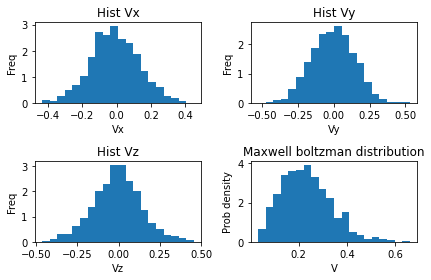

In [16]:
hist_plot("str", vel)

In [17]:
def no_bounds(pos, vel):
    """initialisation for wall potential"""
    return pos, vel

In [18]:
def compute_force(pos): # initialised to zero at the beginning of the simulation-- will increase later
    """set forces to 0"""
    pos = np.zeros((N,3))
    
    return np.zeros(pos.shape)


In [19]:
def pbc(pos, vel): #velocity here does not change, wrote it this way to accomodate Angle function(change in velocity)
    """Periodic boundary conditions, ensures that any atoms that move out of the box are placed back into the box again"""
    for i in range(N):
        for j in range(3):
            if pos[i,j]<0:
                pos[i,j] = L+pos[i,j] #pos[i,j] is negative, hence sign should be + so that pos[i,j] <L
                
                
            elif pos[i,j]>L:
                pos[i,j] = pos[i,j]-L
                
    return pos, vel

In [20]:
def Angle(pos, vel):
    """Boundary where particles bounces off the wall at an angle"""
    for i in range(N):
        for j in range(3):
            if pos[i,j]<0:
                pos[i,j] = pos[i,j]*(-1) #When particles in x, y, z coodrinates outside of the "box", pos<0. angle reflection has to be same
                vel[i,j]=  vel[i,j]*(-1)
                
            elif pos[i,j]>L:
                pos[i,j] = 2*L-pos[i,j] #When particles in x, y, z coodrinates outside of the "box", pos>L. angle reflection has to be same
                vel[i,j]=  vel[i,j]*(-1)
                
    return pos, vel

In [21]:
def wall_force(pos):
    """Wall potential repulsion according to lennard jones potential, only the repulsion part of the equation is taken into accound"""
    
    force = np.zeros((N,3))
    for i in range(N):
        for j in range(3):
            if pos[i,j]<(0+(10*sigma)):
                force[i,j] = 4*epsilon*(12*(sigma/pos[i,j])**13)
                
                
                
            elif pos[i,j]>(L-(10*sigma)):
                force[i,j] = -4*epsilon*(12*(sigma/(L-pos[i,j]))**13) #- sign, because the force needs to be in the negative direction
                
                
    return force   

In [22]:
def Euler(pos, vel, boundary):
    """Euler algorithm, kraft frei"""
    pos_new = pos+ vel*dt
    pos_new, vel_new =boundary(pos_new, vel)       
        
    
    
    return pos_new

In [1]:
m

NameError: name 'm' is not defined

In [52]:
def Verlet(pos, pos_old, vel, force, boundary):
    """Verlet algorithm"""
    force = compute_force(pos)
    #force = compute_force(pos) + wall_force(pos) # In order to implement wall potential
    pos_new = 2*pos - pos_old + force/m * dt**2
    pos_new, vel_new =boundary(pos_new, vel)
    
    return pos_new, pos

In [58]:
#def Velocity_verlet(pos, vel, boundary):
 #   """Initial Velocity Verlet for pbc and angle reflection"""
 #   force = Force(pos)
 #   pos_new = pos + vel*dt + (force/(2*m))*dt**2 
 #   force_new = Force(pos_new)
 #   vel_new = vel + ((force_new + force)/(2*m))*dt
 #   pos_new =boundary(pos_new)
    
 #   return pos_new, vel_new

In [45]:
def Velocity_verlet(pos, vel, boundary):
    """Velocity Verlet to run with Wall boundary repulsion according to lennard jones potential.
    Only repulsion is taken into account"""
    #force = compute_force(pos)+ wall_force(pos) #when computing forces for wall_function
    force = compute_force(pos)
    pos_new = pos + vel*dt + (force/(2*m))*dt**2  # Veleocity verlet algorithm for position
    #force_new = compute_force(pos_new) + wall_force(pos_new) #new forces for the wall_function
    force_new = compute_force(pos_new)
    vel_new = vel + ((force_new + force)/(2*m))*dt # Veleocity verlet algorithm for velocity
    pos_new, vel_new =boundary(pos_new, vel_new)
    
    return pos_new, vel_new

In [34]:
def Leapfrog(pos, vel, boundary):
    """Leapfrog algorithm"""
    force = compute_force(pos) #when computing forces, this will not be correct
    #force = compute_force(pos) + wall_force(pos) # in order to implement wall_force repulsion
    vel_new = vel + dt*(force/m)
    pos_new = pos + dt*vel_new
    pos_new, vel_new =boundary(pos_new, vel_new)
    
    return pos_new, vel_new


In [26]:
def e_kin(vel):
    """Kinetic enery of the system"""
    KE = np.sum(1/2*m*vel**2)
    
    return KE

In [27]:
def test_pos():
    """For testing of the different boundaries"""
    pos = np.array([[L/2,L/2,L/2], [L/2,L/2,L/2], [L/2,L/2,L/2], [L/2,L/2,L/2]])
    
    return pos

In [28]:
def test_vel():
    """For testing of the different boundaries"""
    vel = np.array([[0.05,0,0], [0.05,0.05,0.05], [0,0.075,0.05], [0,0.05,0]])
    
    return vel


In [54]:
def main(mode):
    """Run euler algorithm"""
    pos=init_pos()
    vel=init_vel(N)
    #pos=test_pos()
    #vel=test_vel()
    file_name=open("read.pdb", "w")
    file_name.write('CRYST1'+str("{0:9.3f}{0:9.3f}{0:9.3f}").format(L*10,L*10,L*10)+'  90.00  90.00  90.00 P 1           1\n')
    if mode == 0:
        """Run euler algorithm"""
        for n_iter in range(n_steps):
            pos=Euler(pos, vel, pbc)
            if n_iter%5000 ==0:
                write_file(file_name, pos, n_iter)
            KE = e_kin(vel)
            
            
    if mode == 1:
        """Run verlet algorithm"""
        pos_old = pos
        pos = Euler(pos, vel, pbc)
        for n_iter in range(n_steps):
            force=compute_force(pos)
            #force+=wall_force(pos)
            #pos, pos_old=Verlet(pos, pos_old, vel, force, no_bounds)
            pos, pos_old=Verlet(pos, pos_old, vel, force, Angle)
            if n_iter%5000 ==0:
                write_file(file_name, pos, n_iter)
            KE = e_kin(vel)
            
            
    if mode == 2:
        """Run verlocity verlet algorithm"""
        for n_iter in range(n_steps):
            #pos, vel = Velocity_verlet(pos, vel, pbc)
            pos, vel = Velocity_verlet(pos, vel, Angle) #to implement wall_force boundary
            if n_iter%5000 ==0:
                write_file(file_name, pos, n_iter)
            KE = e_kin(vel)
            
    
    if mode == 3:
        """Run leapfrog algorithm"""
        for n_iter in range(n_steps):
            pos, vel = Leapfrog(pos, vel, Angle) #to implement wall_force boundary
            if n_iter%5000 ==0:
                write_file(file_name, pos, n_iter)
            KE = e_kin(vel)
            
            
    file_name.close()

In [55]:
main(1)